<a href="https://colab.research.google.com/github/Fawzy-AI-Explorer/Data-Preprocessing/blob/main/Missing_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HI**

                                   

**How to deal with Null Values ?**                                              


*   Get the number of missing values  

*   visualize the number of missing values in each feature.

*   Missing Values in each Row.

           1.   if any Row has more than 50 % NUlls ---- > delete it.


*   Missing Values in each column

            *   if any column has more than 50 % NUlls.
                  1.   if it is important you can delete rows with null in this feature but you loss 50 % from data.
                  2.   if it is not important -----? delete the column.




*   Handle the rest of Null Values

          1.   separate Numerical and categorical Features containing Nulls.

          2.   outliers in numerical Features.

          3.   mean and median and mode

          3.   Using box plots to identify outliers and visualize it.

*      Filling Nulls                                                         
          
           1.   numerical features with no outliers   -----> (fill with mean)  

           2.   numerical features with  outliers     -----> (fill with median)

           3.   categorical Features                  -----> (fill with mode)



**Is it different to deal with NUlls if Feature is Numeric Categories?**

# **import libraries**

In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# **read data**

In [232]:
data = pd.read_csv("/content/NFL Play by Play 2009-2016 (v3).csv")

<ipython-input-232-0241e2ac0222>:1: DtypeWarning:

Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.



**The first thing to do when you get a new dataset is take a look at some of it. This lets you see that it all read in correctly and gives an idea of what's going on with the data.**

In [89]:
data.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2.009091e+09,1.0,1.0,NaN,15:00,15.0,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009.0
1,2009-09-10,2.009091e+09,1.0,1.0,1.0,14:53,15.0,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009.0
2,2009-09-10,2.009091e+09,1.0,1.0,2.0,14:16,15.0,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009.0
3,2009-09-10,2.009091e+09,1.0,1.0,3.0,13:35,14.0,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009.0
4,2009-09-10,2.009091e+09,1.0,1.0,4.0,13:27,14.0,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009.0


**How many missing data points do we have?                                
Let's see how many we have.**

---
---



In [90]:
data.isnull()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244386,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
244387,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
244388,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
244389,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**this return a table (true if null false if not null) with the same dimension of data**

In [91]:
data.isnull().sum().sum()

6192908

198620 .there are a lot of missing values in dataset

In [92]:
data.isnull().sum()
#data.isnull().sum(axis=0) the same axis=0 --> apply the sum in each column

Date             0
GameID           1
Drive            1
qtr              1
down         36060
             ...  
Win_Prob     14318
WPA           3047
airWPA      149506
yacWPA      149643
Season           1
Length: 102, dtype: int64

In [93]:
# # data.isnull().sum()
# data.isnull().sum(axis=1) #the same axis=1 --> apply the sum in each row

# **visualize the number of missing values in each feature.**

In [94]:
#First we create a list of missing values by each feature
temp = list(data.isnull().sum())

#then we create a list of columns and their missing values as inner list to a separate list
lst= []
i=0
for col in data.columns:
    insert_lst = [col,temp[i]]
    lst.append(insert_lst)
    i+=1

#finally create a dataframe
temp_data = pd.DataFrame(data=lst,columns=['Column_Name','Missing_Values'])

In [95]:
fig = px.bar(temp_data.sort_values(by='Missing_Values'),x='Missing_Values',y='Column_Name',
             orientation='h',height=1500,width=900,color='Missing_Values',text='Missing_Values',title='Missing values in train dataset')
fig.update_traces(textposition='outside')
fig.show()

In [96]:
#The following columns have missing values

temp_data[temp_data['Missing_Values']>0].sort_values(by='Missing_Values',
                                                 ascending=False).reset_index(drop=True).style.background_gradient(cmap='Reds')

,Column_Name,Missing_Values
0,DefTwoPoint,244391
1,BlockingPlayer,244316
2,TwoPointConv,244089
3,ChalReplayResult,242443
4,RecFumbTeam,241651
5,RecFumbPlayer,241651
6,Interceptor,241542
7,FieldGoalDistance,239052
8,FieldGoalResult,238991
9,ExPointResult,238249


**47 columns with missing values,                        
Three are numerical features And the rest are categorical features.**

**First i will check Nulls in each Row :**


*   if Row contains alot of Nulls ----> delete it



#**Missing Values in each Row(Step By Step)**

In [97]:
mask = data.isnull()                         # table    t/f
mask

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244386,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
244387,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
244388,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
244389,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [98]:
rows_with_nan = mask.any( axis = 1)          # or between rows   t/f ( size = num of rows * 1 )
rows_with_nan

0         True
1         True
2         True
3         True
4         True
          ... 
244386    True
244387    True
244388    True
244389    True
244390    True
Length: 244391, dtype: bool

In [99]:
num_rows_with_nan  = rows_with_nan.sum()     # num of t in rows_with
# num_rows_with_nan  = rows_with_nan.sum(axis = 0)     # num of t in rows_with_nan (num of rows_with_nan)
# num_rows_with_nan  = rows_with_nan.sum(axis = 1)     # error
num_rows_with_nan

244391

**Any rowhas at least 1 null values**

In [100]:
sum_nulls_each_row = mask.sum(axis = 1)      # sum_nulls_each_row
sum_nulls_each_row

0          30
1          20
2          26
3          21
4          29
         ... 
244386     25
244387     20
244388     28
244389     20
244390    101
Length: 244391, dtype: int64

In [101]:
total_num_of_columns  = len(data.columns)
total_num_of_columns

102

In [102]:
percentage_nulls_each_row = (sum_nulls_each_row / total_num_of_columns) * 100
percentage_nulls_each_row

0         29.411765
1         19.607843
2         25.490196
3         20.588235
4         28.431373
            ...    
244386    24.509804
244387    19.607843
244388    27.450980
244389    19.607843
244390    99.019608
Length: 244391, dtype: float64

# **Missing Values in each Row**

In [233]:
def missing_data_rows (data):
  mask = data.isnull()                         # table    t/f
  rows_with_nan = mask.any( axis = 1)          # or between rows   t/f ( size = num of rows * 1 )
  num_rows_with_nan  = rows_with_nan.sum()     # num of t in rows_with_nan
  sum_nulls_each_row = mask.sum(axis = 1)      # sum_nulls_each_row
  total_num_of_columns  = len(data.columns)
  percentage_nulls_each_row = (sum_nulls_each_row / total_num_of_columns) * 100
  # for i in percentage_nulls_each_row :
  #   print(i)
  return percentage_nulls_each_row



In [234]:
percentage_nulls_each_row = missing_data_rows(data)
percentage_nulls_each_row


0         29.411765
1         19.607843
2         25.490196
3         20.588235
4         28.431373
            ...    
244386    24.509804
244387    19.607843
244388    27.450980
244389    19.607843
244390    99.019608
Length: 244391, dtype: float64

**If the Row has greater than 50% Null ---> I will delete it**

# **Delete rows containing more than 50% Nulls**

In [235]:
#'rows_to_drop' is a list of row indices or a boolean array indicating the rows you want to drop
rows_to_drop = []

for index , value in percentage_nulls_each_row.items():
  if(value > 50):
    rows_to_drop.append(index)
    print(f"{index} : {value}%")


2717 : 54.90196078431373%
2719 : 54.90196078431373%
16717 : 53.92156862745098%
55126 : 52.94117647058824%
56462 : 51.9607843137255%
69505 : 53.92156862745098%
69515 : 53.92156862745098%
69517 : 54.90196078431373%
73594 : 50.98039215686274%
73779 : 53.92156862745098%
76600 : 53.92156862745098%
124511 : 50.98039215686274%
125511 : 50.98039215686274%
162228 : 54.90196078431373%
165191 : 53.92156862745098%
194204 : 53.92156862745098%
213136 : 53.92156862745098%
244390 : 99.01960784313727%


In [236]:
def remove_rows_with_null(data, rows_to_drop):
    print(f"Before remove the shape is: {data.shape}")
    data.drop(index=rows_to_drop, inplace=True)
    print(f"After remove the shape is: {data.shape}")
    return data

In [237]:
data = remove_rows_with_null(data, rows_to_drop)
#Before remove the shape is: (244391, 102)
# After remove the shape is: (244373, 102)

Before remove the shape is: (244391, 102)
After remove the shape is: (244373, 102)


# **Missing Values in each column(Step By Step)**

In [23]:
mask = data.isnull()                         # table    t/f
cols_with_nan = mask.any( axis = 0)          # or col   t/f
num_cols_with_nan  = cols_with_nan.sum()     # num of t in cols_with_nan (num of cols_with_nan)

num_cols_with_nan  , data.shape

(60, (15579, 102))

In [24]:
sum_nulls_each_col = mask.sum(axis = 0)      # sum_nulls_each_col

sum_nulls_each_col

Date           0
GameID         0
Drive          0
qtr            0
down        2383
            ... 
Win_Prob    1025
WPA          238
airWPA      9633
yacWPA      9645
Season         0
Length: 102, dtype: int64

In [25]:
cols_with_nulls_greater_zero = sum_nulls_each_col[sum_nulls_each_col>0]
cols_with_nulls_greater_zero

down                    2383
time                      10
TimeSecs                  10
PlayTimeDiff              22
SideofField               22
yrdln                     30
yrdline100                30
GoalToGo                  30
FirstDown               1095
posteam                 1028
DefensiveTeam           1028
ExPointResult          15193
TwoPointConv           15564
DefTwoPoint            15579
PuntResult             14696
Passer                  9337
PassOutcome             9336
PassLength              9377
PassLocation            9377
Interceptor            15407
Rusher                 10844
RunLocation            10887
RunGap                 12219
Receiver                9564
ReturnResult           15124
Returner               14410
BlockingPlayer         15577
Tackler1                6083
Tackler2               13387
FieldGoalResult        15262
FieldGoalDistance      15266
RecFumbTeam            15369
RecFumbPlayer          15369
ChalReplayResult       15469
PenalizedTeam 

In [26]:
total_num_of_rows  = len(data) #7796 num of rows
percentage_nulls_each_col = (sum_nulls_each_col / total_num_of_rows)*100
percentage_nulls_each_col

Date         0.000000
GameID       0.000000
Drive        0.000000
qtr          0.000000
down        15.296232
              ...    
Win_Prob     6.579370
WPA          1.527698
airWPA      61.833237
yacWPA      61.910264
Season       0.000000
Length: 102, dtype: float64

# **Missing Values in each column**

In [238]:
def missing_data_cols (data):
  mask = data.isnull()                         # table    t/f
  cols_with_nan = mask.any( axis = 0)          # or col   t/f
  num_cols_with_nan  = cols_with_nan.sum()     # num of t in cols_with_nan (num of cols_with_nan)
  sum_nulls_each_col = mask.sum(axis = 0)      # sum_nulls_each_col
  cols_with_nulls_greater_zero = sum_nulls_each_col[sum_nulls_each_col>0]
  total_num_of_rows  = len(data)
  percentage_nulls_each_col = (sum_nulls_each_col / total_num_of_rows) * 100
  return percentage_nulls_each_col




In [239]:
percentage_nulls_each_col = missing_data_cols (data)
percentage_nulls_each_col

Date         0.000000
GameID       0.000000
Drive        0.000000
qtr          0.000000
down        14.748765
              ...    
Win_Prob     5.851710
WPA          1.239499
airWPA      61.172061
yacWPA      61.228123
Season       0.000000
Length: 102, dtype: float64

In [240]:
for index, value in percentage_nulls_each_col.items():
  if(value > 0):
    print(f"{index} : {value}")

down : 14.748765207285583
time : 0.04214868254676253
TimeSecs : 0.04214868254676253
PlayTimeDiff : 0.08961710172564072
SideofField : 0.11908025845735822
yrdln : 0.18987367671551278
yrdline100 : 0.18987367671551278
GoalToGo : 0.18987367671551278
FirstDown : 6.993816829191441
posteam : 5.850482663796737
DefensiveTeam : 5.850482663796737
desc : 0.000818421020325486
ExPointResult : 97.48662904658043
TwoPointConv : 99.87641842593085
DefTwoPoint : 100.0
PuntResult : 94.43514627229686
Passer : 59.32856739492497
PassOutcome : 59.114959508620025
PassLength : 59.37562660359369
PassLocation : 59.37562660359369
Interceptor : 98.83415925654634
Rusher : 69.9283472396705
RunLocation : 70.18574065056286
RunGap : 78.12074165312862
Receiver : 60.75016470723034
ReturnResult : 95.92876463439087
Returner : 93.29917789608508
BlockingPlayer : 99.9693092117378
Tackler1 : 40.087898417582956
Tackler2 : 87.47406628391843
FieldGoalResult : 97.7902632451212
FieldGoalDistance : 97.81522508624111
RecFumbTeam : 98.87

# **Delete cols containing more than 50% Nulls**

In [241]:
# #'cols_to_drop' is a list of column names you want to drop

cols_to_drop = []

for index, value in percentage_nulls_each_col.items():
  if(value > 50):
    cols_to_drop.append(index)
    print(f"{index} : {value}")

ExPointResult : 97.48662904658043
TwoPointConv : 99.87641842593085
DefTwoPoint : 100.0
PuntResult : 94.43514627229686
Passer : 59.32856739492497
PassOutcome : 59.114959508620025
PassLength : 59.37562660359369
PassLocation : 59.37562660359369
Interceptor : 98.83415925654634
Rusher : 69.9283472396705
RunLocation : 70.18574065056286
RunGap : 78.12074165312862
Receiver : 60.75016470723034
ReturnResult : 95.92876463439087
Returner : 93.29917789608508
BlockingPlayer : 99.9693092117378
Tackler2 : 87.47406628391843
FieldGoalResult : 97.7902632451212
FieldGoalDistance : 97.81522508624111
RecFumbTeam : 98.87876320215409
RecFumbPlayer : 98.87876320215409
ChalReplayResult : 99.20285792620298
PenalizedTeam : 92.95257659397724
PenaltyType : 96.03024884091123
PenalizedPlayer : 93.2758528970058
airEPA : 61.14873574412886
yacEPA : 61.174106795758945
airWPA : 61.17206074320812
yacWPA : 61.22812258310042


In [242]:
cols_to_drop

['ExPointResult',
 'TwoPointConv',
 'DefTwoPoint',
 'PuntResult',
 'Passer',
 'PassOutcome',
 'PassLength',
 'PassLocation',
 'Interceptor',
 'Rusher',
 'RunLocation',
 'RunGap',
 'Receiver',
 'ReturnResult',
 'Returner',
 'BlockingPlayer',
 'Tackler2',
 'FieldGoalResult',
 'FieldGoalDistance',
 'RecFumbTeam',
 'RecFumbPlayer',
 'ChalReplayResult',
 'PenalizedTeam',
 'PenaltyType',
 'PenalizedPlayer',
 'airEPA',
 'yacEPA',
 'airWPA',
 'yacWPA']

In [243]:

# Sample Series with string index
s = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])

# Index label of the value you want to delete
index_label_to_delete = ['c','d']  ##list

# Delete the value with the specified index label


print("Original Series:")
print(s)
print("\nSeries after deleting value with index label")
s.drop(index_label_to_delete,inplace =True)
print(s)
s = s.reset_index()
print(s)


Original Series:
a    1
b    2
c    3
d    4
e    5
dtype: int64

Series after deleting value with index label
a    1
b    2
e    5
dtype: int64
  index  0
0     a  1
1     b  2
2     e  5


In [244]:
# # if the col(feature) has a lot of null values ---> drop it
def remove_cols_with_null(data, cols_to_drop,percentage_nulls_each_col):
    print(f"Before remove the shape is: {data.shape}\n number of deleted cols : {len(cols_to_drop)}")
    data.drop(columns=cols_to_drop, inplace=True)
    percentage_nulls_each_col.drop(cols_to_drop,inplace =True)
    percentage_nulls_each_col = percentage_nulls_each_col.reset_index()

    print(f"After removing, the shape is: {data.shape}")
    return data

In [245]:
data = remove_cols_with_null(data, cols_to_drop,percentage_nulls_each_col)

Before remove the shape is: (244373, 102)
 number of deleted cols : 29
After removing, the shape is: (244373, 73)


In [246]:
null_cols_gr_zero = []
for index, value in percentage_nulls_each_col.items():
  if(value > 0):
    print(f"{index} : {value}")
    null_cols_gr_zero.append(index)


down : 14.748765207285583
time : 0.04214868254676253
TimeSecs : 0.04214868254676253
PlayTimeDiff : 0.08961710172564072
SideofField : 0.11908025845735822
yrdln : 0.18987367671551278
yrdline100 : 0.18987367671551278
GoalToGo : 0.18987367671551278
FirstDown : 6.993816829191441
posteam : 5.850482663796737
DefensiveTeam : 5.850482663796737
desc : 0.000818421020325486
Tackler1 : 40.087898417582956
PosTeamScore : 6.320665539973729
DefTeamScore : 6.320665539973729
ScoreDiff : 5.849255032266249
AbsScoreDiff : 6.320665539973729
No_Score_Prob : 0.034373682853670415
Opp_Field_Goal_Prob : 0.034373682853670415
Opp_Safety_Prob : 0.034373682853670415
Opp_Touchdown_Prob : 0.034373682853670415
Field_Goal_Prob : 0.034373682853670415
Safety_Prob : 0.034373682853670415
Touchdown_Prob : 0.034373682853670415
ExpPts : 0.034373682853670415
EPA : 0.08470657560368781
Home_WP_pre : 5.837797137981692
Away_WP_pre : 5.837797137981692
Home_WP_post : 6.209360281209462
Away_WP_post : 6.209360281209462
Win_Prob : 5.8517

In [247]:
null_cols_gr_zero

['down',
 'time',
 'TimeSecs',
 'PlayTimeDiff',
 'SideofField',
 'yrdln',
 'yrdline100',
 'GoalToGo',
 'FirstDown',
 'posteam',
 'DefensiveTeam',
 'desc',
 'Tackler1',
 'PosTeamScore',
 'DefTeamScore',
 'ScoreDiff',
 'AbsScoreDiff',
 'No_Score_Prob',
 'Opp_Field_Goal_Prob',
 'Opp_Safety_Prob',
 'Opp_Touchdown_Prob',
 'Field_Goal_Prob',
 'Safety_Prob',
 'Touchdown_Prob',
 'ExpPts',
 'EPA',
 'Home_WP_pre',
 'Away_WP_pre',
 'Home_WP_post',
 'Away_WP_post',
 'Win_Prob',
 'WPA']

# **Handle the rest of  Null Values**

**First step , I Will separate Numerical and categorical Features**


*   Numerical :                                                                 
   **If there are outliers ,I can fill them with median values if not then mean is fine.**
*   categorical :                                                               
    **fill with mode or new class**



# **separate Numerical and categorical Features containing Nulls**

In [248]:
Numerical_Features=[]
for col in data.columns:
    if data[col].dtype=='int64' or data[col].dtype=='float64' :
        Numerical_Features.append(col)

In [249]:
(Numerical_Features)

['GameID',
 'Drive',
 'qtr',
 'down',
 'TimeUnder',
 'TimeSecs',
 'PlayTimeDiff',
 'yrdln',
 'yrdline100',
 'ydstogo',
 'ydsnet',
 'GoalToGo',
 'FirstDown',
 'PlayAttempted',
 'Yards.Gained',
 'sp',
 'Touchdown',
 'Safety',
 'Onsidekick',
 'PassAttempt',
 'AirYards',
 'YardsAfterCatch',
 'QBHit',
 'InterceptionThrown',
 'RushAttempt',
 'Reception',
 'Fumble',
 'Sack',
 'Challenge.Replay',
 'Accepted.Penalty',
 'Penalty.Yards',
 'PosTeamScore',
 'DefTeamScore',
 'ScoreDiff',
 'AbsScoreDiff',
 'Timeout_Indicator',
 'posteam_timeouts_pre',
 'HomeTimeouts_Remaining_Pre',
 'AwayTimeouts_Remaining_Pre',
 'HomeTimeouts_Remaining_Post',
 'AwayTimeouts_Remaining_Post',
 'No_Score_Prob',
 'Opp_Field_Goal_Prob',
 'Opp_Safety_Prob',
 'Opp_Touchdown_Prob',
 'Field_Goal_Prob',
 'Safety_Prob',
 'Touchdown_Prob',
 'ExPoint_Prob',
 'TwoPoint_Prob',
 'ExpPts',
 'EPA',
 'Home_WP_pre',
 'Away_WP_pre',
 'Home_WP_post',
 'Away_WP_post',
 'Win_Prob',
 'WPA',
 'Season']

Numerical_Features in all data i want numerical feature and has nulls

In [250]:
percentage_nulls_each_col.keys()

Index(['Date', 'GameID', 'Drive', 'qtr', 'down', 'time', 'TimeUnder',
       'TimeSecs', 'PlayTimeDiff', 'SideofField', 'yrdln', 'yrdline100',
       'ydstogo', 'ydsnet', 'GoalToGo', 'FirstDown', 'posteam',
       'DefensiveTeam', 'desc', 'PlayAttempted', 'Yards.Gained', 'sp',
       'Touchdown', 'Safety', 'Onsidekick', 'PlayType', 'Passer_ID',
       'PassAttempt', 'AirYards', 'YardsAfterCatch', 'QBHit',
       'InterceptionThrown', 'Rusher_ID', 'RushAttempt', 'Receiver_ID',
       'Reception', 'Tackler1', 'Fumble', 'Sack', 'Challenge.Replay',
       'Accepted.Penalty', 'Penalty.Yards', 'PosTeamScore', 'DefTeamScore',
       'ScoreDiff', 'AbsScoreDiff', 'HomeTeam', 'AwayTeam',
       'Timeout_Indicator', 'Timeout_Team', 'posteam_timeouts_pre',
       'HomeTimeouts_Remaining_Pre', 'AwayTimeouts_Remaining_Pre',
       'HomeTimeouts_Remaining_Post', 'AwayTimeouts_Remaining_Post',
       'No_Score_Prob', 'Opp_Field_Goal_Prob', 'Opp_Safety_Prob',
       'Opp_Touchdown_Prob', 'Field_Goal_Pr

In [251]:
(null_cols_gr_zero) #len -->32

['down',
 'time',
 'TimeSecs',
 'PlayTimeDiff',
 'SideofField',
 'yrdln',
 'yrdline100',
 'GoalToGo',
 'FirstDown',
 'posteam',
 'DefensiveTeam',
 'desc',
 'Tackler1',
 'PosTeamScore',
 'DefTeamScore',
 'ScoreDiff',
 'AbsScoreDiff',
 'No_Score_Prob',
 'Opp_Field_Goal_Prob',
 'Opp_Safety_Prob',
 'Opp_Touchdown_Prob',
 'Field_Goal_Prob',
 'Safety_Prob',
 'Touchdown_Prob',
 'ExpPts',
 'EPA',
 'Home_WP_pre',
 'Away_WP_pre',
 'Home_WP_post',
 'Away_WP_post',
 'Win_Prob',
 'WPA']

In [252]:
Numerical_Features_with_null=[]
for col in null_cols_gr_zero:
      print(col)
      if data[col].dtype=='int64' or data[col].dtype=='float64' :
          Numerical_Features_with_null.append(col)

down
time
TimeSecs
PlayTimeDiff
SideofField
yrdln
yrdline100
GoalToGo
FirstDown
posteam
DefensiveTeam
desc
Tackler1
PosTeamScore
DefTeamScore
ScoreDiff
AbsScoreDiff
No_Score_Prob
Opp_Field_Goal_Prob
Opp_Safety_Prob
Opp_Touchdown_Prob
Field_Goal_Prob
Safety_Prob
Touchdown_Prob
ExpPts
EPA
Home_WP_pre
Away_WP_pre
Home_WP_post
Away_WP_post
Win_Prob
WPA


In [253]:
(Numerical_Features_with_null) # len ----> 26

['down',
 'TimeSecs',
 'PlayTimeDiff',
 'yrdln',
 'yrdline100',
 'GoalToGo',
 'FirstDown',
 'PosTeamScore',
 'DefTeamScore',
 'ScoreDiff',
 'AbsScoreDiff',
 'No_Score_Prob',
 'Opp_Field_Goal_Prob',
 'Opp_Safety_Prob',
 'Opp_Touchdown_Prob',
 'Field_Goal_Prob',
 'Safety_Prob',
 'Touchdown_Prob',
 'ExpPts',
 'EPA',
 'Home_WP_pre',
 'Away_WP_pre',
 'Home_WP_post',
 'Away_WP_post',
 'Win_Prob',
 'WPA']

In [254]:
for i in Numerical_Features_with_null:
  print(f"{i} has {data[i].isnull().sum()} nulls.")
print(data.shape)

down has 36042 nulls.
TimeSecs has 103 nulls.
PlayTimeDiff has 219 nulls.
yrdln has 464 nulls.
yrdline100 has 464 nulls.
GoalToGo has 464 nulls.
FirstDown has 17091 nulls.
PosTeamScore has 15446 nulls.
DefTeamScore has 15446 nulls.
ScoreDiff has 14294 nulls.
AbsScoreDiff has 15446 nulls.
No_Score_Prob has 84 nulls.
Opp_Field_Goal_Prob has 84 nulls.
Opp_Safety_Prob has 84 nulls.
Opp_Touchdown_Prob has 84 nulls.
Field_Goal_Prob has 84 nulls.
Safety_Prob has 84 nulls.
Touchdown_Prob has 84 nulls.
ExpPts has 84 nulls.
EPA has 207 nulls.
Home_WP_pre has 14266 nulls.
Away_WP_pre has 14266 nulls.
Home_WP_post has 15174 nulls.
Away_WP_post has 15174 nulls.
Win_Prob has 14300 nulls.
WPA has 3029 nulls.
(244373, 73)


In [255]:
data[(Numerical_Features_with_null)]

,down,TimeSecs,PlayTimeDiff,yrdln,yrdline100,GoalToGo,FirstDown,PosTeamScore,DefTeamScore,ScoreDiff,...,Safety_Prob,Touchdown_Prob,ExpPts,EPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA
0,NaN,3600.0,0.0,30.0,30.0,0.0,NaN,0.0,0.0,0.0,...,0.003592,0.313676,0.323526,2.014474,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758
1,1.0,3593.0,7.0,42.0,58.0,0.0,0.0,0.0,0.0,0.0,...,0.003638,0.423011,2.338000,0.077907,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655
2,2.0,3556.0,37.0,47.0,53.0,0.0,0.0,0.0,0.0,0.0,...,0.003826,0.421478,2.415907,-1.402760,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295
3,3.0,3515.0,41.0,44.0,56.0,0.0,0.0,0.0,0.0,0.0,...,0.004776,0.318621,1.013147,-1.712583,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576
4,4.0,3507.0,8.0,44.0,56.0,0.0,1.0,0.0,0.0,0.0,...,0.006404,0.208111,-0.699436,2.097796,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244385,1.0,3110.0,27.0,45.0,45.0,0.0,0.0,0.0,0.0,0.0,...,0.003306,0.477085,3.339807,-0.551049,0.402879,0.597121,0.420483,0.579517,0.597121,-0.017604
244386,2.0,3073.0,37.0,45.0,45.0,0.0,0.0,0.0,0.0,0.0,...,0.003621,0.419575,2.788758,0.433511,0.420483,0.579517,0.406755,0.593245,0.579517,0.013728
244387,3.0,3029.0,44.0,37.0,37.0,0.0,0.0,0.0,0.0,0.0,...,0.003202,0.435418,3.222269,-2.979466,0.406755,0.593245,0.500356,0.499644,0.593245,-0.093601
244388,4.0,2982.0,47.0,38.0,38.0,0.0,1.0,0.0,0.0,0.0,...,0.000340,0.067907,0.242804,-3.007542,0.500356,0.499644,0.576196,0.423804,0.499644,-0.075841


In [256]:
categorical_Features_with_null=[]
for col in null_cols_gr_zero:
      print(col)
      if data[col].dtype=='object':
          categorical_Features_with_null.append(col)

down
time
TimeSecs
PlayTimeDiff
SideofField
yrdln
yrdline100
GoalToGo
FirstDown
posteam
DefensiveTeam
desc
Tackler1
PosTeamScore
DefTeamScore
ScoreDiff
AbsScoreDiff
No_Score_Prob
Opp_Field_Goal_Prob
Opp_Safety_Prob
Opp_Touchdown_Prob
Field_Goal_Prob
Safety_Prob
Touchdown_Prob
ExpPts
EPA
Home_WP_pre
Away_WP_pre
Home_WP_post
Away_WP_post
Win_Prob
WPA


In [257]:
(categorical_Features_with_null)  #len----->6

['time', 'SideofField', 'posteam', 'DefensiveTeam', 'desc', 'Tackler1']

In [258]:
data[(categorical_Features_with_null)]

,time,SideofField,posteam,DefensiveTeam,desc,Tackler1
0,15:00,TEN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,M.Griffin
1,14:53,PIT,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,C.Hope
2,14:16,PIT,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,S.Tulloch
3,13:35,PIT,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,NaN
4,13:27,PIT,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,NaN
...,...,...,...,...,...,...
244385,06:50,TB,MIN,TB,(6:50) J.McKinnon left tackle to TB 45 for no ...,L.David
244386,06:13,TB,MIN,TB,(6:13) J.McKinnon right tackle to TB 37 for 8 ...,D.Goldson
244387,05:29,TB,MIN,TB,(5:29) (Shotgun) T.Bridgewater pass short righ...,L.David
244388,04:42,TB,MIN,TB,(4:42) (Field Goal formation) B.Walsh 56 yard ...,NaN


In [259]:
# ['down', 'TimeSecs', 'PlayTimeDiff', 'yrdln', 'yrdline100', 'GoalToGo', 'FirstDown', 'PosTeamScore', 'DefTeamScore', 'ScoreDiff', 'AbsScoreDiff', 'No_Score_Prob', 'Opp_Field_Goal_Prob', 'Opp_Safety_Prob', 'Opp_Touchdown_Prob', 'Field_Goal_Prob', 'Safety_Prob', 'Touchdown_Prob', 'ExpPts', 'EPA', 'Home_WP_pre', 'Away_WP_pre', 'Home_WP_post', 'Away_WP_post', 'Win_Prob', 'WPA']

In [260]:
data[(Numerical_Features_with_null)]

,down,TimeSecs,PlayTimeDiff,yrdln,yrdline100,GoalToGo,FirstDown,PosTeamScore,DefTeamScore,ScoreDiff,...,Safety_Prob,Touchdown_Prob,ExpPts,EPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA
0,NaN,3600.0,0.0,30.0,30.0,0.0,NaN,0.0,0.0,0.0,...,0.003592,0.313676,0.323526,2.014474,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758
1,1.0,3593.0,7.0,42.0,58.0,0.0,0.0,0.0,0.0,0.0,...,0.003638,0.423011,2.338000,0.077907,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655
2,2.0,3556.0,37.0,47.0,53.0,0.0,0.0,0.0,0.0,0.0,...,0.003826,0.421478,2.415907,-1.402760,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295
3,3.0,3515.0,41.0,44.0,56.0,0.0,0.0,0.0,0.0,0.0,...,0.004776,0.318621,1.013147,-1.712583,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576
4,4.0,3507.0,8.0,44.0,56.0,0.0,1.0,0.0,0.0,0.0,...,0.006404,0.208111,-0.699436,2.097796,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244385,1.0,3110.0,27.0,45.0,45.0,0.0,0.0,0.0,0.0,0.0,...,0.003306,0.477085,3.339807,-0.551049,0.402879,0.597121,0.420483,0.579517,0.597121,-0.017604
244386,2.0,3073.0,37.0,45.0,45.0,0.0,0.0,0.0,0.0,0.0,...,0.003621,0.419575,2.788758,0.433511,0.420483,0.579517,0.406755,0.593245,0.579517,0.013728
244387,3.0,3029.0,44.0,37.0,37.0,0.0,0.0,0.0,0.0,0.0,...,0.003202,0.435418,3.222269,-2.979466,0.406755,0.593245,0.500356,0.499644,0.593245,-0.093601
244388,4.0,2982.0,47.0,38.0,38.0,0.0,1.0,0.0,0.0,0.0,...,0.000340,0.067907,0.242804,-3.007542,0.500356,0.499644,0.576196,0.423804,0.499644,-0.075841


# **outliers in numerical Features**

col1 = [1, 2, 3]:

Mean = (1 + 2 + 3) / 3 = 2
Median = 2 (since it's the middle value when arranged in ascending order)

---
---
---
col2 =  [1, 2, 3, 55]:

Mean = (1 + 2 + 3 + 55) / 4 = 15.25
Median = (2 + 3) / 2 = 2.5 (since it's the average of the two middle values when arranged in ascending order)

---
---
---
---
---
---

in col1 there is no outliers mean = 2     , median = 2                         
in col2 there is    outliers mean = 15.25 , median = 2.5

so if **there is outliers** filling nulls with **mean** ---> **Bad choice** median is **Best**

# **Using box plots to identify outliers**

Use Matplotlib's boxplot() function to produce a boxplot of the data.

The interquartile range (IQR) of the data is shown by a box in the boxplot, and the median is shown by a horizontal line.

By dividing the first quartile (Q1) by the third quartile, the IQR (Q3) is derived (Q3). Use the formulas higher bound = Q3 + 1.5*IQR and lower bound = Q1 - 1.5*IQR to estimate the upper and lower bounds of outliers.

Outlier observations are those that go outside the top and lower boundaries, which the boxplot can recognise.

The annotate() function allows you to name the outliers and display their values or indices in the graphic.

# **Example calc outlier and visualize it**

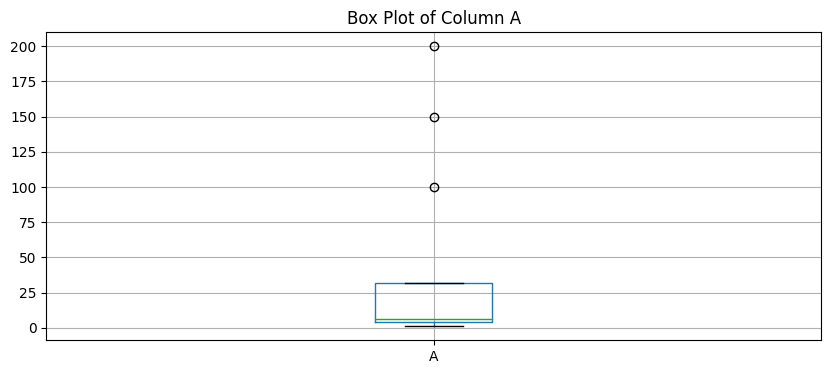

In [196]:


# Sample DataFrame
data_ex = pd.DataFrame({
    'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 100,150,200],
    'B': [1, 2, 3, 4, 5, 6, 7, 8, 9, 20,30,40]

})

# Create a box plot
plt.figure(figsize=(10, 4))
data_ex.boxplot(column=['A'])
plt.title('Box Plot of Column A')
plt.grid(True)
plt.show()
#--------------------------------------------------



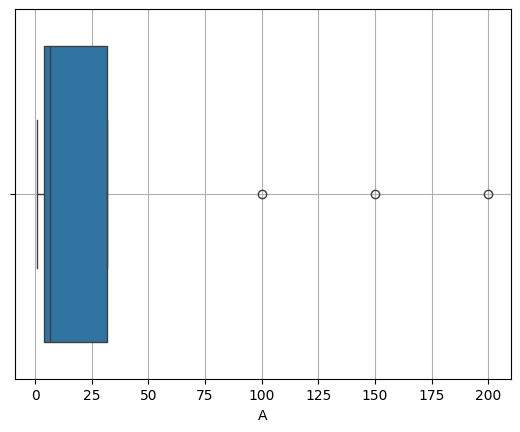

In [197]:
# Create boxplot
sns.boxplot(x=data_ex["A"])
plt.grid(True)
# Show plot
plt.show()

Text(0, 0.5, 'Values')

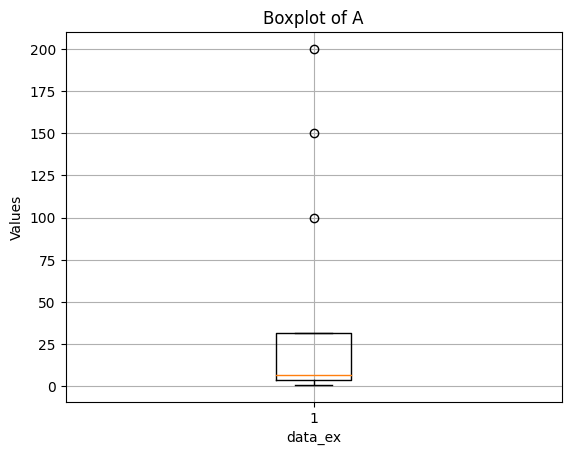

In [198]:
fig, ax = plt.subplots()
plt.grid(True)
ax.boxplot(data_ex['A'])
#ax.boxplot(data)

# Set title and labels
ax.set_title('Boxplot of A')
ax.set_xlabel('data_ex')
ax.set_ylabel('Values')

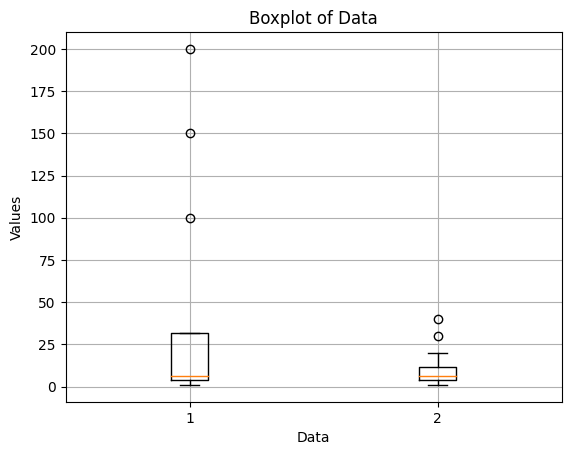

In [199]:
# Create boxplot
fig, ax = plt.subplots()
ax.boxplot(data_ex)
plt.grid(True)
# Set title and labels
ax.set_title('Boxplot of Data')
ax.set_xlabel('Data')
ax.set_ylabel('Values')
#Show plot
plt.show()

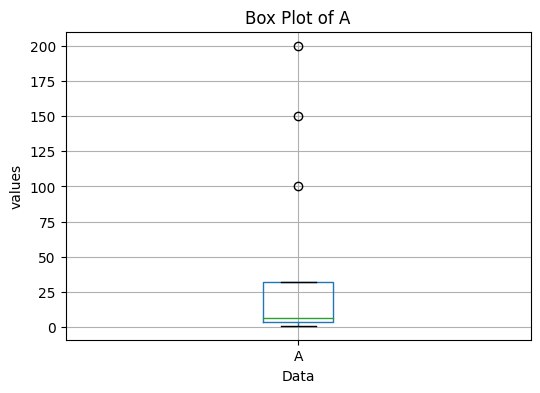

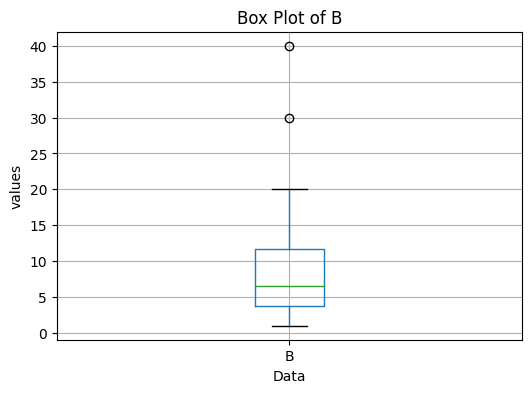

In [224]:
for column in data_ex.columns:
    plt.figure(figsize=(6, 4))

    # Draw box plot for the current column
    data_ex.boxplot(column=column)

    plt.title(f'Box Plot of {column}')
    plt.xlabel('Data')
    plt.ylabel('values')
    plt.grid(True)
    plt.show()

A :: 
q1 :3.75
q3 :31.75
upper_bound :
73.75
lower_bound :
-38.25

number of outliers = 3 , Outliers : [100, 150, 200]


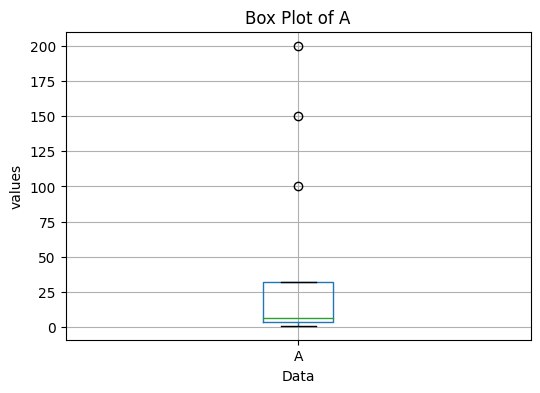

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


B :: 
q1 :3.75
q3 :11.75
upper_bound :
23.75
lower_bound :
-8.25

number of outliers = 2 , Outliers : [30, 40]


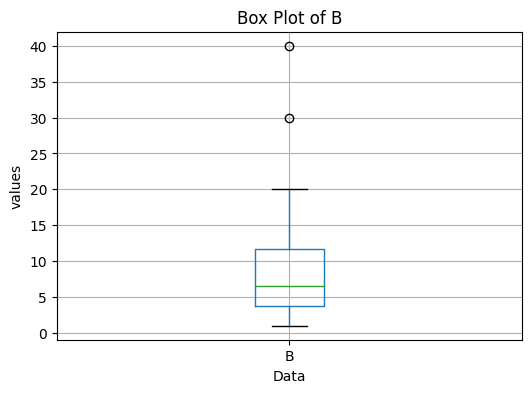

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________




In [266]:
# Calculate quartiles for each column
q1 = data_ex.quantile(0.25)
q3 = data_ex.quantile(0.75)

iqr = q3 - q1

# print(f"q1 :\n{q1}\nq3 :\n{q3}")# Calculate IQR (Interquartile Range) for each column
# Calculate lower and upper bounds for outliers for each column
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# print(f"upper_bound :\n{upper_bound}\nlower_bound :\n{lower_bound}\n")
# Find outliers in each column
outliers = {}
for column in data_ex.columns:
    outliers[column] = data_ex[(data_ex[column] < lower_bound[column]) | (data_ex[column] > upper_bound[column])][column].tolist()

    print(f"{column} :: \nq1 :{q1[column]}\nq3 :{q3[column]}")# Calculate IQR (Interquartile Range) for each column
    print(f"upper_bound :\n{upper_bound[column]}\nlower_bound :\n{lower_bound[column]}\n")
    print(f"number of outliers = {len(outliers[column])} , Outliers : {outliers[column]}")

    plt.figure(figsize=(6, 4))
    data_ex.boxplot(column=column)
    plt.title(f'Box Plot of {column}')
    plt.xlabel('Data')
    plt.ylabel('values')
    plt.grid(True)
    plt.show()

    print("________________________________________________________________________________________________________________________________")
    print("________________________________________________________________________________________________________________________________\n\n")



# **Finaly :                                                             function to calc and visualize outliers**

**another Note Book to handeling Outliers**

In [273]:
def calc_visualize_outliers (data , cols ):
  # Calculate quartiles for each column
  q1 = data.quantile(0.25)
  q3 = data.quantile(0.75)

  iqr = q3 - q1

  # print(f"q1 :\n{q1}\nq3 :\n{q3}")# Calculate IQR (Interquartile Range) for each column
  # Calculate lower and upper bounds for outliers for each column
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)

  # print(f"upper_bound :\n{upper_bound}\nlower_bound :\n{lower_bound}\n")
  # Find outliers in each column
  outliers = {}
  null_cols_with_no_outlires = []
  null_cols_with_outlires = []
  for column in cols:
      outliers[column] = data[(data[column] < lower_bound[column]) | (data[column] > upper_bound[column])][column].tolist()

      print(f"{column} :: \nq1 :{q1[column]}\nq3 :{q3[column]}")# Calculate IQR (Interquartile Range) for each column
      print(f"upper_bound :\n{upper_bound[column]}\nlower_bound :\n{lower_bound[column]}\n")
      print(f"number of outliers = {len(outliers[column])} , Outliers : {outliers[column]}")
      if (len(outliers[column]) == 0 ):
        null_cols_with_no_outlires.append(column)
      else :
        null_cols_with_outlires.append(column)


      plt.figure(figsize=(6, 4))
      data.boxplot(column=column)
      plt.title(f'Box Plot of {column}')
      plt.xlabel('Data')
      plt.ylabel('values')
      plt.grid(True)
      plt.show()

      print("________________________________________________________________________________________________________________________________")
      print("________________________________________________________________________________________________________________________________\n\n")
  return   null_cols_with_no_outlires , null_cols_with_outlires



In [274]:
Numerical_Features_with_null

['down',
 'TimeSecs',
 'PlayTimeDiff',
 'yrdln',
 'yrdline100',
 'GoalToGo',
 'FirstDown',
 'PosTeamScore',
 'DefTeamScore',
 'ScoreDiff',
 'AbsScoreDiff',
 'No_Score_Prob',
 'Opp_Field_Goal_Prob',
 'Opp_Safety_Prob',
 'Opp_Touchdown_Prob',
 'Field_Goal_Prob',
 'Safety_Prob',
 'Touchdown_Prob',
 'ExpPts',
 'EPA',
 'Home_WP_pre',
 'Away_WP_pre',
 'Home_WP_post',
 'Away_WP_post',
 'Win_Prob',
 'WPA']

<ipython-input-273-fc331d341e9a>:3: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-273-fc331d341e9a>:4: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



down :: 
q1 :1.0
q3 :3.0
upper_bound :
6.0
lower_bound :
-2.0

number of outliers = 0 , Outliers : []


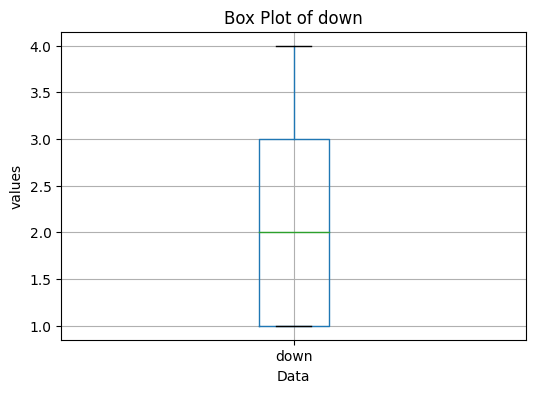

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


TimeSecs :: 
q1 :779.0
q3 :2586.0
upper_bound :
5296.5
lower_bound :
-1931.5

number of outliers = 0 , Outliers : []


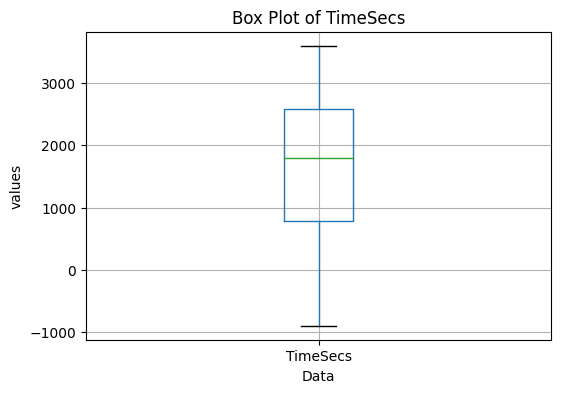

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


PlayTimeDiff :: 
q1 :5.0
q3 :37.0
upper_bound :
85.0
lower_bound :
-43.0

number of outliers = 106 , Outliers : [89.0, 92.0, 97.0, 146.0, 188.0, 95.0, 177.0, 177.0, 198.0, 160.0, 122.0, 96.0, 92.0, 86.0, 98.0, 86.0, 95.0, 112.0, 105.0, 234.0, 115.0, 102.0, 89.0, 100.0, 900.0, 908.0, 95.0, 145.0, 98.0, 88.0, 102.0, 106.0, 117.0, 113.0, 89.0, 96.0, 87.0, 900.0, 927.0, 100.0, 97.0, 144.0, 90.0, 103.0, 120.0, 102.0, 110.0, 89.0, 88.0, 87.0, 112.0, 116.0, 87.0, 109.0, 87.0, 322.0, 282.0, 282.0, 282.0, 704.0, 704.0, 699.0, 690.0, 647.0, 646.0, 609.0, 645.0, 635.0, 629.0, 629.0, 452.0, 409.0, 355.0, 351.0, 379.0, 88.0, 193.0, 97.0, 102.0, 98.0, 143.0, 195.0, 93.0, 86.0, 88.0, 100.0, 106.0, 147.0, 93.0, 90.0, 86.0, 88.0, 97.0, 91.0, 95.0,

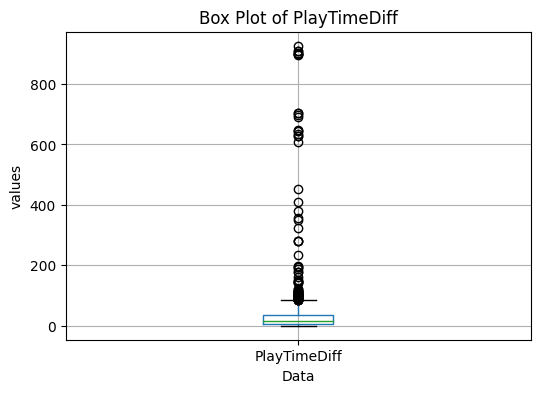

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


yrdln :: 
q1 :20.0
q3 :39.0
upper_bound :
67.5
lower_bound :
-8.5

number of outliers = 0 , Outliers : []


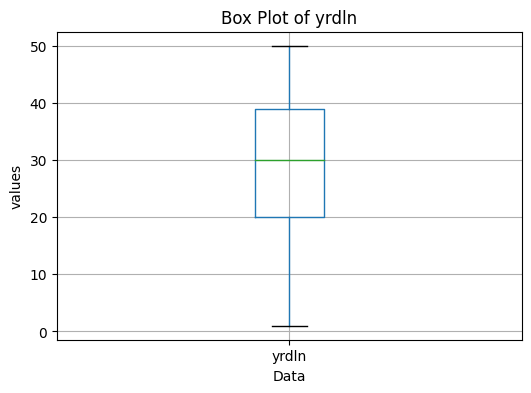

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


yrdline100 :: 
q1 :30.0
q3 :70.0
upper_bound :
130.0
lower_bound :
-30.0

number of outliers = 0 , Outliers : []


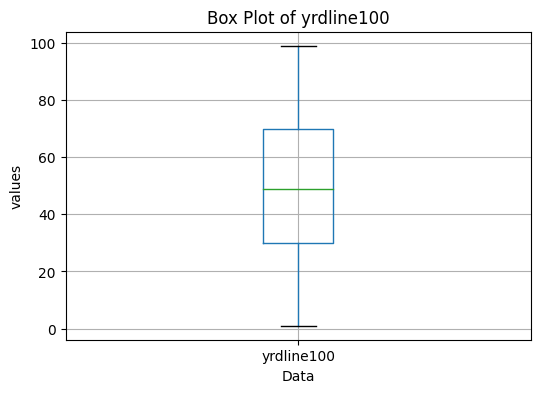

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


GoalToGo :: 
q1 :0.0
q3 :0.0
upper_bound :
0.0
lower_bound :
0.0

number of outliers = 12016 , Outliers : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0

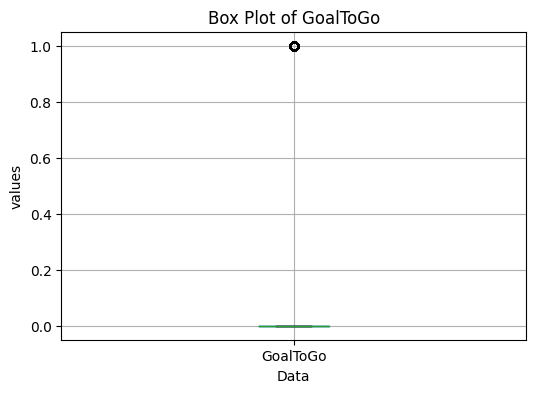

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


FirstDown :: 
q1 :0.0
q3 :1.0
upper_bound :
2.5
lower_bound :
-1.5

number of outliers = 0 , Outliers : []


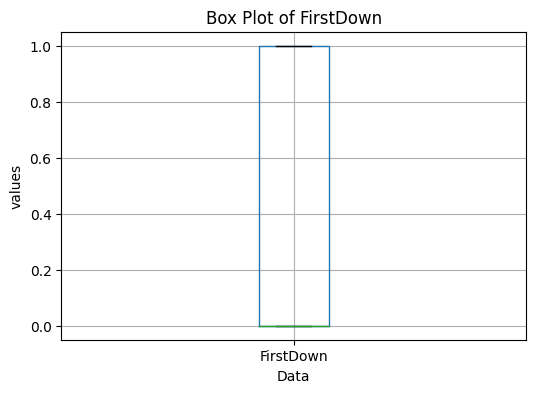

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


PosTeamScore :: 
q1 :2.0
q3 :17.0
upper_bound :
39.5
lower_bound :
-20.5

number of outliers = 1549 , Outliers : [44.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 40.0, 41.0, 41.0, 41.0, 41.0, 41.0, 40.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 47.0, 40.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 44.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 45.0, 45.0, 45.0, 45.0, 45.0, 40.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 47.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 44.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45

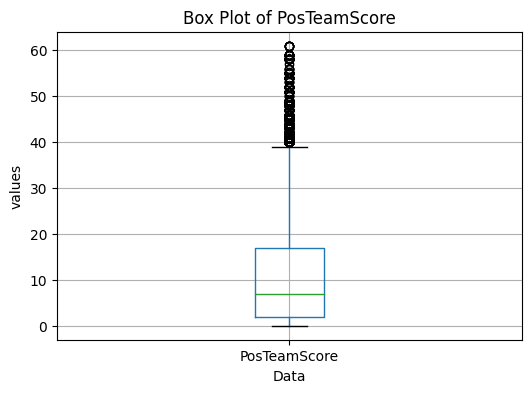

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


DefTeamScore :: 
q1 :3.0
q3 :17.0
upper_bound :
38.0
lower_bound :
-18.0

number of outliers = 2459 , Outliers : [45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 47.0, 47.0, 47.0, 47.0, 47.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 44.0, 44.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 41.0, 41.0, 41.0, 41

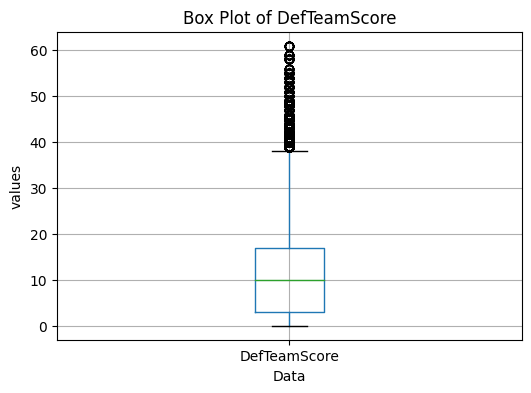

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


ScoreDiff :: 
q1 :-7.0
q3 :4.0
upper_bound :
20.5
lower_bound :
-23.5

number of outliers = 14089 , Outliers : [21.0, 22.0, 22.0, 22.0, 22.0, 21.0, 25.0, -26.0, -26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, -26.0, -26.0, -26.0, -26.0, -26.0, 26.0, 26.0, 26.0, 26.0, -26.0, -26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, -26.0, -26.0, -26.0, 26.0, 26.0, 26.0, 26.0, 26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, -26.0, 26.0, 26.0, 21.0, 27.0, -28.0, -28.0, -28.0, -28.0, -28.0, -28.0, -28.0, -28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, -28.0, -28.0, -28.0, -28.0, 28.0, 2

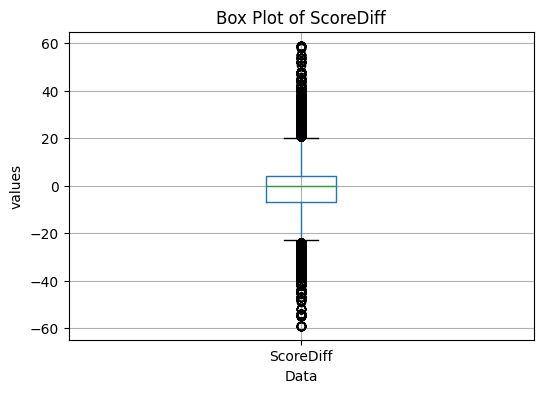

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


AbsScoreDiff :: 
q1 :3.0
q3 :11.0
upper_bound :
23.0
lower_bound :
-9.0

number of outliers = 11446 , Outliers : [25.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 27.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28

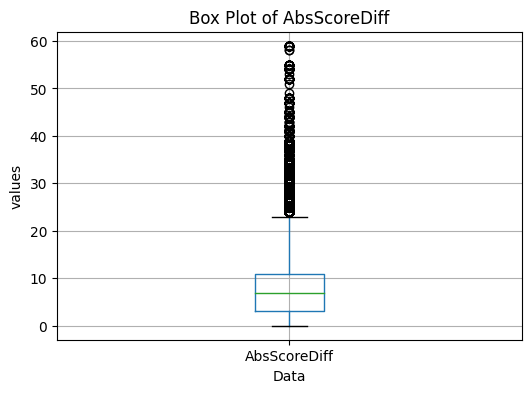

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


No_Score_Prob :: 
q1 :0.0028172902435699
q3 :0.1717566280147832
upper_bound :
0.4251656346716032
lower_bound :
-0.25059171641325007

number of outliers = 25401 , Outliers : [0.5482374528807114, 0.5606055025809148, 0.4977153965510217, 0.5924117406642573, 0.6917119569184887, 0.6473656772354671, 0.6693545206455115, 0.7200128180598324, 0.6892640770665033, 0.6823157719025179, 0.5769978575008787, 0.4896145662262187, 0.5159181096041442, 0.6164413877807022, 0.6563908115950787, 0.5099455173191295, 0.5263237374471259, 0.5029778583300466, 0.5190942037279099, 0.5289985432381025, 0.6839358058073143, 0.5247371264645531, 0.440880224977941, 0.4690424229277117, 0.7792613716979747, 0.7847927067802641, 0.7900359450086925, 0.7817966242236783, 0.42707

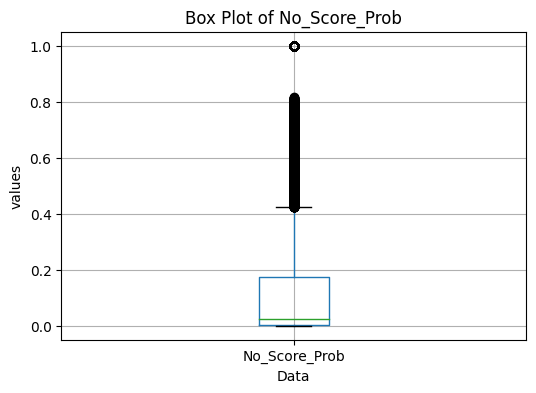

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


Opp_Field_Goal_Prob :: 
q1 :0.0349844139875581
q3 :0.1505816243337739
upper_bound :
0.32397743985309757
lower_bound :
-0.13841140153176562

number of outliers = 372 , Outliers : [0.3372997279861532, 0.3405706895597866, 0.3310957543548519, 0.3357052508107075, 0.3334307804407901, 0.3474579223555161, 0.3244565764630033, 0.3275055029484546, 0.3346790548892215, 0.3460433794264407, 0.3296938547260009, 0.3345687743407609, 0.3248194679156311, 0.3274679104964789, 0.3344652318211867, 0.3283958661385198, 0.337640795970675, 0.32455353707307, 0.324452985813106, 0.3396639188142418, 0.343044062749812, 0.329150065535759, 0.3300410984104718, 0.3355997914862004, 0.3342278060799465, 0.3377432518224434, 0.326261772857571, 0.3294109239235532, 0.340434

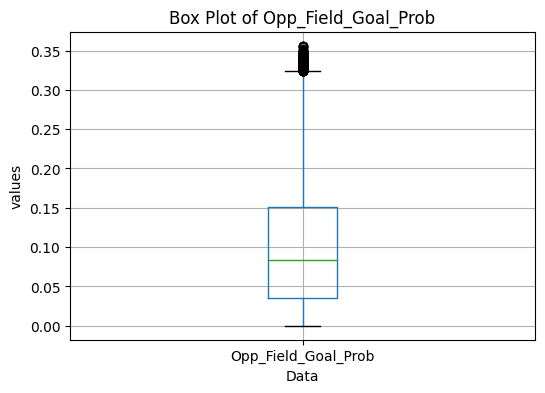

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


Opp_Safety_Prob :: 
q1 :0.00010659461097362474
q3 :0.0039143183409477
upper_bound :
0.009625903935908812
lower_bound :
-0.005604990983987488

number of outliers = 10663 , Outliers : [0.0259227988781177, 0.0241315884397959, 0.0185068172047473, 0.0134298700162289, 0.0130722018714557, 0.0181911735535026, 0.0099463786520248, 0.0206225660326541, 0.0184487452536717, 0.0187785663826204, 0.0139376137020954, 0.0138595283536184, 0.0115819599367623, 0.0097847830560961, 0.009916513537714, 0.011177909624929, 0.010014136472653, 0.0096423253173419, 0.0105746349485337, 0.0111518135716088, 0.0108445984177721, 0.0116624909681735, 0.0116686865899068, 0.0104216656682115, 0.0119626608610037, 0.0107892590258898, 0.0112582120766363, 0.0114693318929721, 

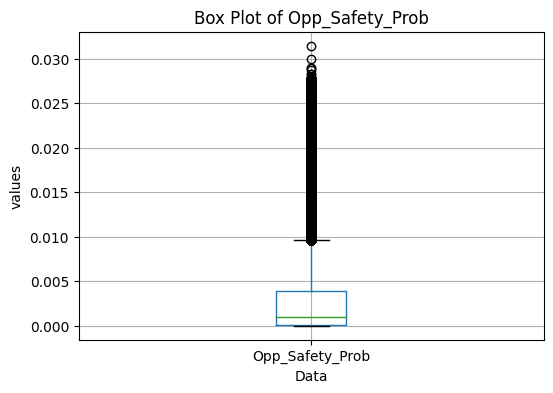

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


Opp_Touchdown_Prob :: 
q1 :0.0405599536284854
q3 :0.2272920498232536
upper_bound :
0.5073901941154059
lower_bound :
-0.23953819066366688

number of outliers = 0 , Outliers : []


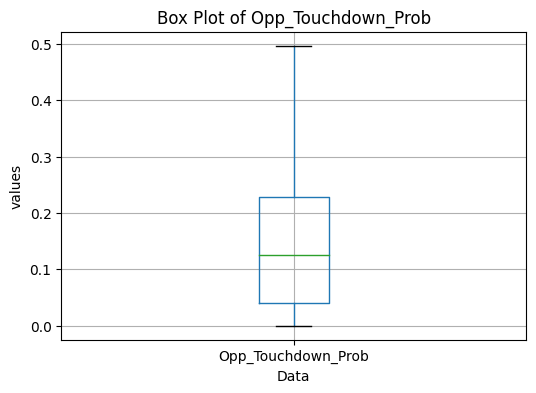

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


Field_Goal_Prob :: 
q1 :0.1533714248724327
q3 :0.3268317499881854
upper_bound :
0.5870222376618146
lower_bound :
-0.10681906280119643

number of outliers = 6363 , Outliers : [0.8950157926700414, 0.950566372768498, 0.7932313023132651, 0.6330246743287934, 0.9446790695136462, 0.9407798279177572, 0.8810102238479642, 0.9901369689287052, 0.991980935350596, 0.8749287106980852, 0.7698099279821483, 0.8059464308181117, 0.9233016164409268, 0.880578143698955, 0.9799745344729172, 0.6195881288573086, 0.5990460878333999, 0.7016878663270781, 0.8803925118372727, 0.9871487354645964, 0.7537511657361033, 0.5997551044638952, 0.6022636117445205, 0.6566734348797794, 0.979801375790603, 0.9790046341239316, 0.7634794000134273, 0.6790921736728008, 0.7980795

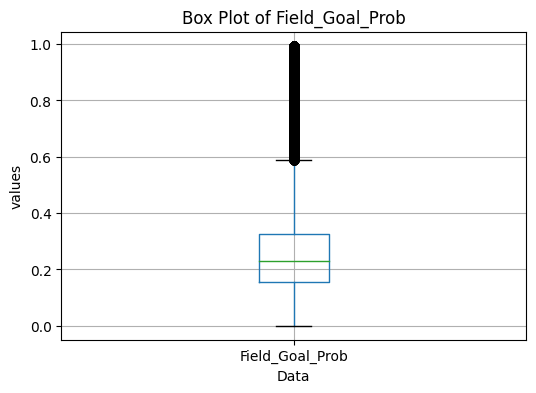

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


Safety_Prob :: 
q1 :0.0019145734521676
q3 :0.0035799111807407
upper_bound :
0.00607791777360035
lower_bound :
-0.00058343314069205

number of outliers = 2019 , Outliers : [0.0064040032777064, 0.006246283267285, 0.0062758608807721, 0.0061301917753898, 0.0062723891800855, 0.0061595323352866, 0.0061944256638343, 0.0064669826748539, 0.0063792982249818, 0.0064820860570014, 0.0065223110903182, 0.0061085201735682, 0.0062289697361543, 0.0061481059769066, 0.0064192890696677, 0.0061913501099692, 0.0063442918774005, 0.0064452886104637, 0.006275263423565, 0.0061975680629964, 0.0061962422978277, 0.006226344200289, 0.0062053398979556, 0.0061602549426809, 0.0060817687510481, 0.0061532069666661, 0.006164843479658, 0.0062933220025122, 0.0062636262

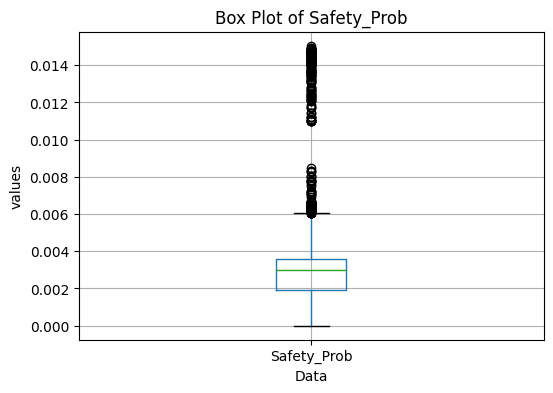

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


Touchdown_Prob :: 
q1 :0.1927237683727196
q3 :0.4087417884299808
upper_bound :
0.7327688185158727
lower_bound :
-0.13130326171317225

number of outliers = 2972 , Outliers : [0.8081236511005713, 0.8434101699074086, 0.8055204406266049, 0.8404622308596403, 0.7350361030358881, 0.7640937997470861, 0.8419516182230543, 0.7501704805940695, 0.8057511294998105, 0.7673734196264881, 0.9118700259278024, 0.9119399390851052, 0.9129508466710486, 0.8435200867272683, 0.8402002141000657, 0.7475498278963747, 0.9119255937528034, 0.8428526513340359, 0.7645338815660998, 0.7346902329967847, 0.7916156884729867, 0.9125752947863136, 0.855564324573034, 0.9045994896921412, 0.9056730944433358, 0.7659294633139794, 0.8396241276265772, 0.8246083727387701, 0.89020

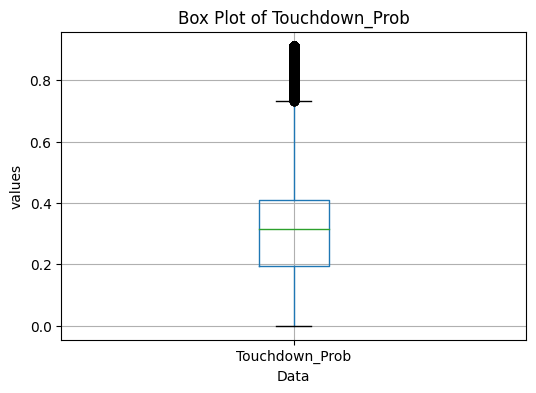

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


ExpPts :: 
q1 :0.3235258536112761
q3 :2.89607859644888
upper_bound :
6.754907710705286
lower_bound :
-3.5353032606451302

number of outliers = 19 , Outliers : [-3.56205764431826, -3.617645375503964, -3.7966283171840978, -3.563747782991283, -3.5481249184302, -3.5453946584432523, -3.789107132522202, -3.618901197612646, -3.57596942925261, -3.650011286658847, -3.5410392281754293, -3.681747660496289, -3.5747185895786835, -3.541434614301943, -3.567428448716842, -3.7747428857461234, -3.587658138146857, -3.617979185130168, -3.754503407153132]


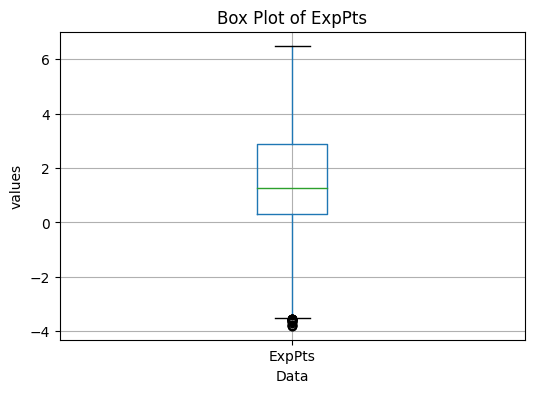

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


EPA :: 
q1 :-0.601346255990609
q3 :0.5652595558922315
upper_bound :
2.3151682737164925
lower_bound :
-2.35125497381487

number of outliers = 18569 , Outliers : [-3.0121469919172554, 3.9492579228643647, -3.632243393661056, -2.5231803037397595, -3.798153017368672, -2.87268555113862, -3.2365317451919333, 4.309289543703653, 2.6548203473084446, 3.609701262057039, -5.6077473421576025, 2.902360845509943, -2.766192733638916, 2.537745391464157, -2.583230532189541, -6.8064021983295335, -3.3484804973691373, 2.9461804103378264, 3.0504570123855697, -6.036276284176136, 5.340295467911778, -2.5976732963943303, 2.420391132958284, 4.8589587323349175, 2.3223511937375028, 3.281130153411997, 3.34954042366544, -2.55388352651673, 4.0429210597836445, -3.

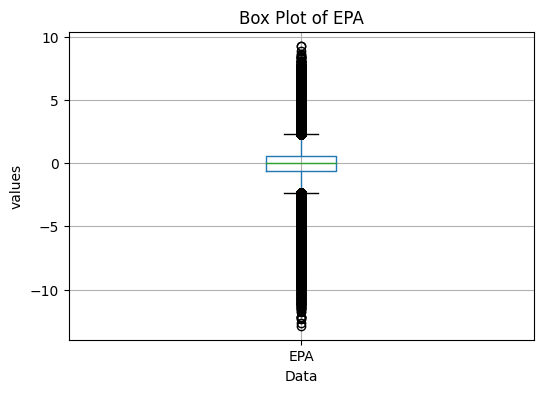

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


Home_WP_pre :: 
q1 :0.31924027752717854
q3 :0.7692630832862576
upper_bound :
1.444297291924876
lower_bound :
-0.35579393111144

number of outliers = 0 , Outliers : []


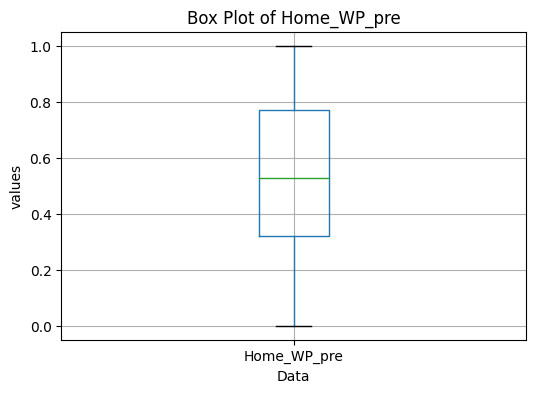

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


Away_WP_pre :: 
q1 :0.23144713842068534
q3 :0.6813826817913784
upper_bound :
1.3562859968474181
lower_bound :
-0.4434561766353543

number of outliers = 0 , Outliers : []


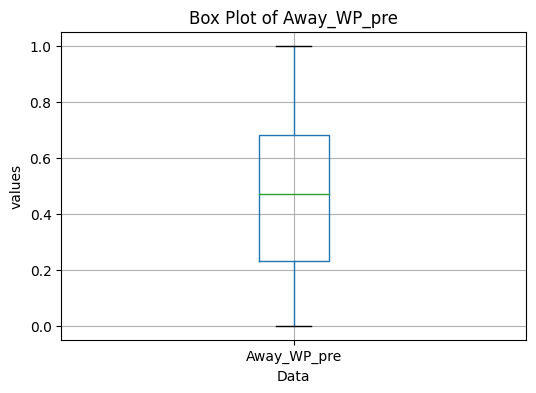

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


Home_WP_post :: 
q1 :0.3157956165453324
q3 :0.7732557178442787
upper_bound :
1.4594458697926982
lower_bound :
-0.3703945354030871

number of outliers = 0 , Outliers : []


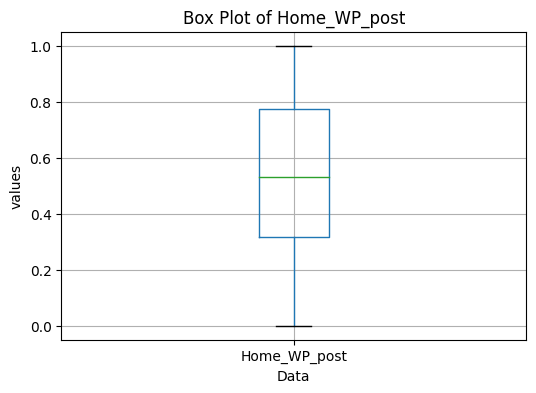

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


Away_WP_post :: 
q1 :0.2273784487905032
q3 :0.6848692006461586
upper_bound :
1.3711053284296417
lower_bound :
-0.45885767899298

number of outliers = 0 , Outliers : []


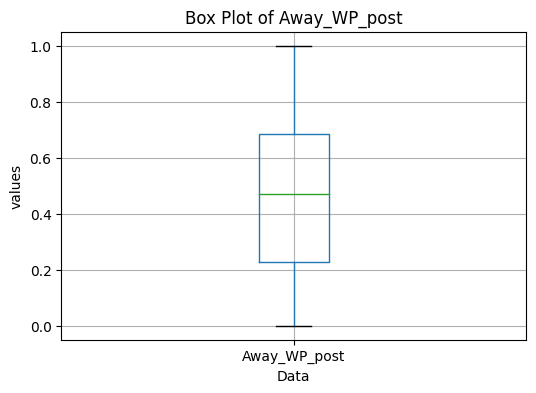

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


Win_Prob :: 
q1 :0.2749941327392757
q3 :0.7294017715997961
upper_bound :
1.4110132298905769
lower_bound :
-0.4066173255515049

number of outliers = 0 , Outliers : []


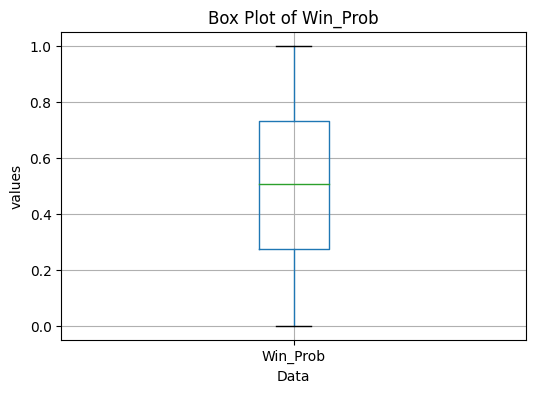

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


WPA :: 
q1 :-0.0145549888008853
q3 :0.014842656049388926
upper_bound :
0.058939123324800266
lower_bound :
-0.05865145607629664

number of outliers = 24870 , Outliers : [0.0607578536153842, 0.0977122872110346, -0.0934452241733198, 0.1217997508362326, -0.0979304210372767, -0.0778966453897648, 0.0612572186240432, -0.0728101095643251, -0.0621032473169322, 0.0652789319728495, 0.0737402052848301, 0.0682324597345158, -0.0834296249981161, 0.1487674553138857, 0.0960040158573781, 0.1176440644831248, -0.1564499813382681, -0.0716830035409905, 0.0972248183995684, 0.1122401673878943, 0.0704292610139193, 0.0905730445568447, -0.0841114133792029, -0.194663323467879, -0.3836986347911338, -0.1028344716375997, -0.0671365380977468, 0.1630915907900509,

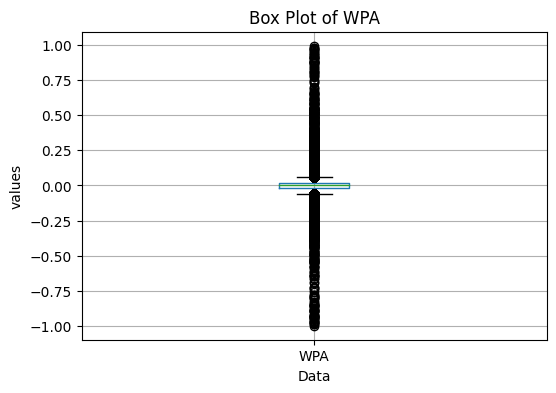

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________




In [275]:
null_cols_with_no_outlires , null_cols_with_outlires = calc_visualize_outliers (data , Numerical_Features_with_null )

In [281]:
print(f" null cols with no outliers :\n{null_cols_with_no_outlires}\n\n\n null cols with  outliers :\n{null_cols_with_outlires}\n\n\ncategorical_Features_with_null:\n{categorical_Features_with_null}   ")

 null cols with no outliers :
['down', 'TimeSecs', 'yrdln', 'yrdline100', 'FirstDown', 'Opp_Touchdown_Prob', 'Home_WP_pre', 'Away_WP_pre', 'Home_WP_post', 'Away_WP_post', 'Win_Prob']


 null cols with  outliers :
['PlayTimeDiff', 'GoalToGo', 'PosTeamScore', 'DefTeamScore', 'ScoreDiff', 'AbsScoreDiff', 'No_Score_Prob', 'Opp_Field_Goal_Prob', 'Opp_Safety_Prob', 'Field_Goal_Prob', 'Safety_Prob', 'Touchdown_Prob', 'ExpPts', 'EPA', 'WPA']


categorical_Features_with_null:
['time', 'SideofField', 'posteam', 'DefensiveTeam', 'desc', 'Tackler1']   


# **Filling Nulls**


1.   null cols with no outliers           -----> (fill with mean)
2.   null_cols_with_outlires              -----> (fill with median)
3.   categorical_Features_with_null       -----> (fill with mode)




In [282]:
def fill_null_with_mean(data, features):
    for feature in features:
        mean_value = data[feature].mean()
        data[feature].fillna(mean_value, inplace=True)
#*****************************************************************
def fill_null_with_median(data, features):
    for feature in features:
        median_value = data[feature].median()
        data[feature].fillna(median_value, inplace=True)
#*****************************************************************
#categorical
def fill_null_with_mode(data, features):
    for feature in features:
        mode_value = data[feature].mode()[0]
        data[feature].fillna(mode_value, inplace=True)

In [283]:
fill_null_with_mean(data , null_cols_with_no_outlires, )
fill_null_with_median(data, null_cols_with_outlires)
fill_null_with_mode(data, categorical_Features_with_null)


# **the end**

In [285]:
data.isnull().sum().sum()

0

**Sometimes we fill nulls in the categorical features a new class depending on the data .**

**In the future :                                                               
How to deal with outliers                                                       
 How to deal with categorical features(label encoding and one hot encoding)**